# Making Re-Usable Code - An Experiment Writeup Example

Matt Clarkson, 2019-11-02

Tutorial is hosted on [gitlab](https://weisslab.cs.ucl.ac.uk/WEISS/SoftwareRepositories/SNAPPY/scikit-surgerytf/blob/master/doc/notebooks/tutorial_reusable_code_example.ipynb), and displayed on [readthedocs](https://scikit-surgerytf.readthedocs.io/en/latest/notebooks/tutorial_reusable_code_example.html#). 

(in fact, if you are reading this on readthedocs, the page itself is generated from that jupyter notebook)

# Introduction

The aim of this notebook is to serve as an example for weekly supervisions with your research supervisor. The researcher should:

* be able to run code
* be able to write notes 

and hence this Jupyter notebook is like the traditional lab book. This tutorial follows on from [this one](https://scikit-surgerytf.readthedocs.io/en/latest/notebooks/tutorial_reusable_code_design.html#), hosted [here on gitlab](https://weisslab.cs.ucl.ac.uk/WEISS/SoftwareRepositories/SNAPPY/scikit-surgerytf/blob/master/doc/notebooks/tutorial_reusable_code_design.ipynb). This notebook demonstrates how you might write up a specific experiment. This need not be verbose. You are not writing a scientific paper. Bullet point lists should be sufficient.


# What about versioning?

Question: Do you need to maintain new versions of this workbook for each supervision meeting?

Answer: No. Just use version control. Commit code before each presentation to your supervisor. The current version just represents the current state-of-play. You can always go back to previous versions.

# Background

* Provide links to the most relevant papers.
* Why are you doing this experiment?

# Hypothesis

* Write down any preconditions, assumptions, caveats.
* Write down the hypothesis for a valid experiment.

# Method

* Outline how you will test the hypothesis.
* Provide links to data-sources.

# Experiments

* Include anything else you can think of relevance, before diving into code.

In [1]:
# Jupyter notebook sets the cwd to the folder containing the notebook.
# So, you want to add the root of the project to the sys path, so modules load correctly.
import sys
sys.path.append("../../")

In [2]:
# Import other packages and modules
from sksurgerytf.models import fashion as f

In [3]:
# Run something. Here, we just demonstrate that we can run TensorFlow via Keras API.
# More specifically, we create an instance of an object in this project.
fmn = f.FashionMNIST()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
60000/60000 [==============================] - 4s 66us/sample - loss: 0.5026 - accuracy: 0.8240 - val_loss: 0.4369 - val_accuracy: 0.8451
10000/1 - 0s - loss: 0.3477 - accuracy: 0.8451


# Results

Here's some ideas of what to present, and examples of how to present them.

## Graphs of Loss

The class used above writes tensorboard log files. That might be easier to analyse.


## Hyperparameter tuning
I would make sure my class object could be created with all the right parameters in the constructor. Then I'd write a script, and run it on cluster machines, writing results to log files. Then i'd collect up the log files, extract the results, save some simple .csv table and import it here, using numpy or pandas. So, this workbook would just contain the results, and the analysis of those results. I wouldn't do much hyperparameter tuning from within a notebook.



## Example Images

As per Andrew Ng's suggestions, pick 100 falsely classified images, display an image thumbnail, along with incorrect result, and the correct result. In this case, we just pick the first 5.

In [4]:
indexes, images, predicted, labels = fmn.extract_failures(5)

In [5]:
print(indexes)

[12, 21, 23, 25, 29]


In [6]:
print(predicted)

[5, 7, 7, 2, 6]


In [7]:
print(labels)

[7, 5, 9, 4, 3]


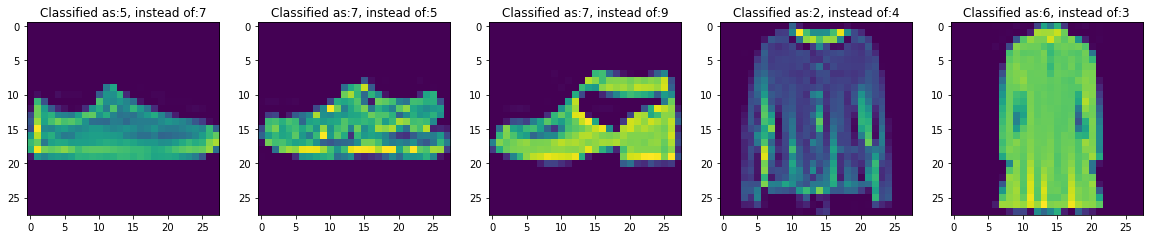

In [23]:
%matplotlib inline

import matplotlib.pyplot as plt

number_of_images = len(indexes)

fig = plt.figure(figsize=(20, 150))

for counter in range(number_of_images):
    a = fig.add_subplot(1, number_of_images, counter+1)
    imgplot = plt.imshow(images[counter])      
    a.set_title("Classified as:" + str(predicted[counter]) + ", instead of:" + str(labels[counter]))


# Conclusions

The aim of the notebook was just to show that brief notes, of code, mixed with text can be an effective way to maintain a lab-book. Furthermore, it can simply by checked in with the current state of your code. 

Each example network would probably benefit from different ways of plotting results.